In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function
import sympy as sp
from numba import jit

In [2]:
# Define the range and divisions for x and p axes
p0=0.5
x0=1.0
f=1/(4*x0*p0)
x_min= -2.0
x_max= 2.0
p_min= -2.0
p_max= 2.0
n_x = 10
n_p = 10

epsilon=1.0
d_t = 0.1
# Create arrays for x and p axes
x_values = np.linspace(x_min, x_max, n_x)
p_values = np.linspace(p_min, p_max, n_p)

x_grid, p_grid = np.meshgrid(x_values, p_values)
# Create the merged array using a list comprehension
#merged_array = [[x_values[i], p_values[i]] for i in range(min(len(x_values), len(p_values)))]

x, x1, p, p1 = sp.symbols('x x1 p p1')
Alpha = Function('Alpha')
Beta = Function('Beta')
Gamma = Function('Gamma')
Delta = Function('Delta')


#grid = merged_array
# Print the merged array
#print("Merged Array:")
#print(merged_array)


In [11]:
"""
Funciones 


SE UTILIZA i PARA REFERIRCE A X y j PARA REFERIRCE A P, EN LOS LOOP.

"""

#---------------------------------FUNCIONES DEL CUBIC SPLINE-------------------------------------------------
def Alpha(x,i,array=x_values):
    return (array[(i+1)%n_x] - x)/(array[(i+1)%n_x] - array[i])
 
def Beta(x,i,array=x_values):
    return 1-Alpha(x,i)


def Gamma(x,i,array=x_values):
    return ( ((Alpha(x,i)**3) - Alpha(x,i))/6 )*((array[(i+1)%n_x]-array[i])**2)


def Delta(x,i,array=x_values):
    return (((Beta(x,i)**3)-Beta(x,i))/6)*((array[(i+1)%n_x]-array[i])**2)
#--------------------------------------------------------------------------------------------------------------

# def Sec_derivate_func(x,p,i,function): # derivada segunda conservando a "p" como variable.
#     return -(1/560)*function(x_values[i-4],p) + (8/315)*function(x_values[i-3],p) - (1/5)*function(x_values[i-2],p) + (8/5)*function(x_values[i-1],p_values[j]) - (205/72)*function(x_values[i],p_values[j]) + (8/5)*function(x_values[(i+1)%n_x],p) - (1/5)*function(x_values[(i+2)%n_x],p) + (8/315)*function(x_values[(i+3)%n_x],p) - (1/560)*function(x_values[(i+4)%n_x],p)


# def Func_csp_func(x,p,i,funcion):# cubic spline concervando a p como variable.
#     return Alpha(x,i)*funcion(x_values[i],p) + Beta(x,i)*funcion(x_values[(i+1)%n_x],p) + Gamma(x,i)*Sec_derivate_func(x,p,i,funcion) + Delta(x,i)*Sec_derivate_func(x,p,i+1,funcion)

# def Func_array_convert(function):#requiere igualar a una variable, crea un array 2D evaluando la funcion en cada punto de la malla, recorre primero en p moviendoce en x.
#     list_loop=[]
#     list_out=[]
#     for i in range(n_x):
#         for j in range(n_p):
#             list_loop.append(function(x_values[i],p_values[j]))
#         list_out.append(list_loop)
#     list_out=np.array(list_loop)
#     return  list_out


#-----------------------------SEGUNDAS DERIVADAS-----------------------------------------------------------

def Sec_derivate_array_plus(func_array): #requiere igualar a una variable
    list_loop = np.zeros((n_x, n_p)).astype('O')
    for j in range(n_p):
        for i in range(n_x):
            list_loop[i][j] = -(1/560)*func_array[i+1-4][j] + (8/315)*func_array[i+1-3][j] - (1/5)*func_array[i+1-2][j] + (8/5)*func_array[i+1-1][j] - (205/72)*func_array[(i+1)%n_x][j] + (8/5)*func_array[(i+1+1)%n_x][j] - (1/5)*func_array[(i+1+2)%n_x][j] + (8/315)*func_array[(i+1+3)%n_x][j] - (1/560)*func_array[(i+1+4)%n_x][j]
    return list_loop
 
def Sec_derivate_array(func_array): #requiere igualar a una variable
    list_loop = np.zeros((n_x, n_p)).astype('O')
    for j in range(n_p):
        for i in range(n_x):
            list_loop[i][j] = -(1/560)*func_array[i-4][j] + (8/315)*func_array[i-3][j] - (1/5)*func_array[i-2][j] + (8/5)*func_array[i-1][j] - (205/72)*func_array[(i)%n_x][j] + (8/5)*func_array[(i+1)%n_x][j] - (1/5)*func_array[(i+2)%n_x][j] + (8/315)*func_array[(i+3)%n_x][j] - (1/560)*func_array[(i+4)%n_x][j]
    return list_loop

def Sec_derivate_array_plus_p(func_array): #requiere igualar a una variable
    list_loop = np.zeros((n_x, n_p)).astype('O')
    for j in range(n_p):
        for i in range(n_x):
            list_loop[i][j] = -(1/560)*func_array[i][j+1-4] + (8/315)*func_array[i][j+1-3] - (1/5)*func_array[i][j+1-2] + (8/5)*func_array[i][j+1-1] - (205/72)*func_array[(i+1)%n_x][j] + (8/5)*func_array[i][(j+1+1)%n_x] - (1/5)*func_array[i][(j+1+2)%n_x] + (8/315)*func_array[i][(j+1+3)%n_x] - (1/560)*func_array[i][(j+1+4)%n_x]
    return list_loop
 
def Sec_derivate_array_p(func_array): #requiere igualar a una variable
    list_loop = np.zeros((n_x, n_p)).astype('O')
    for j in range(n_p):
        for i in range(n_x):
            list_loop[i][j] = -(1/560)*func_array[i][j-4] + (8/315)*func_array[i][j-3] - (1/5)*func_array[i][j-2] + (8/5)*func_array[i][j-1] - (205/72)*func_array[i][(j)%n_x] + (8/5)*func_array[i][(j+1)%n_x] - (1/5)*func_array[i][(j+2)%n_x] + (8/315)*func_array[i][(j+3)%n_x] - (1/560)*func_array[i][(j+4)%n_x]
    return list_loop

#--------------------------------------------------------------------------------------------------------------
# def Func_csp_func(x,p,func_array):# requiere igualar a una variable, Crea la funcion resultante "cubic spline as a interpolation method".
#     list_loop= np.zeros((n_x, n_p)).astype('O')
#     for j in range(n_p): 
#         for i in range(n_x):
#             list_loop[i][j]= Alpha(x,i)*func_array[i][j] + Beta(x,i)*func_array[(i+1)%n_x][j] + Gamma(x,i)*Sec_derivate_func(func_array)[i][j] + Delta(x,i)*Sec_derivate_func(func_array)[(i+1)%n_x][j]
#     return list_loop




#------------------------------CUBIC SPLINE-------------------------------------------------------
def Func_csp_array(x,p,func_array,sec_derivate_array_i,sec_derivate_array_i_plus):# requiere igualar a una variable, Crea la funcion resultante "cubic spline as a interpolation method".
    list_loop= np.zeros((n_x, n_p)).astype('O')
    for j in range(n_p): #
        for i in range(n_x):
            list_loop[i][j] = Alpha(x,i)*func_array[i][j] + Beta(x,i)*func_array[(i+1)%n_x][j] + Gamma(x,i)*sec_derivate_array_i[i][j] + Delta(x,i)*sec_derivate_array_i_plus[i][j]
    return list_loop

def Func_csp_array_p(x,p,func_array,sec_derivate_array_i,sec_derivate_array_i_plus):# requiere igualar a una variable, Crea la funcion resultante "cubic spline as a interpolation method".
    list_loop= np.zeros((n_x, n_p)).astype('O')
    for j in range(n_p): #
        for i in range(n_x):
            list_loop[i][j] = Alpha(p,j)*func_array[i][j] + Beta(p,j)*func_array[i][(j+1)%n_p] + Gamma(p,j)*sec_derivate_array_i[i][j] + Delta(p,j)*sec_derivate_array_i_plus[i][j]
    return list_loop
#------------------------------------------------------------------------------------------------
#--------------------------------INTEGRACION----------------------------------------------------
# def integration_array(functions_array): # requiere igualar a una variable
#     integral = np.zeros((n_x, n_p)).astype('O') 
#     for j in range(n_x):
#         for i in range(n_p):
#             integral[i][j] = sp.integrate(-epsilon*((x-x1)/(x-x1))*functions_array[i][j].subs({x: x1, p: p1}), (x1, x_min,x), (p1, p_min,p_max))+sp.integrate(-epsilon*(-(x-x1)/(x-x1))*functions_array[i][j].subs({x: x1, p: p1}), (x1,x, x_max ), (p1,p_min, p_max))
#     return integral
def integration_array_eval(functions_array): # requiere igualar a una variable
    integral = np.zeros(n_x)#.astype('O')
    for k in range(n_x):
        for j in range(n_p):
            for i in range(n_x):
                integral[k] = sp.integrate(-epsilon*functions_array[i][j].subs({x: x1, p: p1}), (x1, x_min,x_values[k]), (p1, p_min,p_max))+sp.integrate(-epsilon*-functions_array[i][j].subs({x: x1, p: p1}), (x1,x_values[k], x_max ), (p1,p_min, p_max))
    return integral
            

#------------------------------------------------------------------------------------------------
#---------------------------------ADVECCION EN X Y P-------------------------------------------------------
def advection_x(x_new,func_array):
    list_loop= np.zeros((n_x, n_p)).astype('O')
    for j in range(n_p):
        for i in range(n_x):
            list_loop[i][j] = func_array[i][j].subs(x, x_new)
    return list_loop

def advection_p(p_new,func_array,force_array):
    list_loop= np.zeros((n_x, n_p)).astype('O')
    for j in range(n_p):
        for i in range(n_x):
            list_loop[i][j] = func_array[i][j].subs(p, p_new-force_array[i]*d_t)
    return list_loop

#------------------------------------------------------------------------------------------------
#---------------------------------WATER BAG INICIAL, UN CUADRADO---------------------------------
def water_bag():
    function = np.zeros((n_x, n_p))
    for i in range(n_x):
        for j in range(n_p):
            if abs(x_values[i]) < x0:
                if abs(p_values[j]) < p0:
                    function[j][i] = 1/(4*x0*p0)
                else:
                    function[j][i] = 0            
    return function
#------------------------------------------------------------------------------------------------
#---------------------------------Evaluar funciones ---------------------------------------------
def evaluate_array(array_to_evaluate):
    for j in range(n_p):
        for i in range(n_x):
            array_to_evaluate[i][j] = array_to_evaluate[i][j].subs(x, x_values[i]).subs( p, p_values[j])
    return array_to_evaluate


    

In [9]:
"""
LOOP PRINCIPAL CON INTEGRAL CAMBIADA
"""
steps = 10
function_array_main=water_bag()
func_array_main=function_array_main
progress = 0
for step in range(steps):
    progress += 1
    #func_array_main=np.transpose(func_array_main) # TRASPUESTA

    print("segunda derivada de la posición")

    sec_derivate_array_i=Sec_derivate_array(func_array_main) # PASO 1 DEL ALGORITMO
    #sec_derivate_array_i=np.transpose(sec_derivate_array_i) # TRASPUESTA

    sec_derivate_array_i_plus=Sec_derivate_array_plus(func_array_main)
    #sec_derivate_array_i_plus=np.transpose(sec_derivate_array_i_plus) # TRASPUESTA

    print("primer cubic spline")
    func_array_main = Func_csp_array(x,p,func_array_main,sec_derivate_array_i,sec_derivate_array_i_plus) # PASO 2 DEL ALGORITMO
    print("advection_x")
    func_one = advection_x(x-p*d_t/2,func_array_main)
    print("evaluar pre-integral")
    func_one = evaluate_array(func_one)
    print("integration")
    force_array = integration_array_eval(func_one) # INTEGRACION
    
############################################################################################################## momentum
    print("segunda derivada del momentum")
    sec_derivate_array_i=Sec_derivate_array_p(func_one) # PASO 3 DEL ALGORITMO

    sec_derivate_array_i_plus=Sec_derivate_array_plus_p(func_one)
    print("segundo cubic spline")
    func_two = Func_csp_array(x,p,func_one,sec_derivate_array_i,sec_derivate_array_i_plus)# ¿deberia cambiar por una en p ?
    print("advection_p")
    func_three = advection_p(p,func_two,force_array)
    
    print("evaluar funciones")
    func_three = evaluate_array(func_three)

    #  EL PASO 4 ES VOLVER A REPETIR
    
############################################################################################################### position
    

    #func_array_main=np.transpose(func_array_main) # TRASPUESTA
    print("segunda derivada de la posición")
    sec_derivate_array_i=Sec_derivate_array(func_three) # PASO 1 DEL ALGORITMO
    #sec_derivate_array_i=np.transpose(sec_derivate_array_i) # TRASPUESTA
    
    sec_derivate_array_i_plus=Sec_derivate_array_plus(func_three)
    #sec_derivate_array_i_plus=np.transpose(sec_derivate_array_i_plus) # TRASPUESTA

    print("tercer cubic spline")
    func_four = Func_csp_array(x,p,func_three,sec_derivate_array_i,sec_derivate_array_i_plus) # PASO 2 DEL ALGORITMO
    print("advection_x")
    func_four = advection_x(x-p*d_t/2,func_four)
    print("evaluar funciones")
    func_array_main = evaluate_array(func_four)
    
    print("--------------------loop"+str(progress)+"-------------")
    

segunda derivada de la posición
primer cubic spline
advection_x
evaluar pre-integral
integration
segunda derivada del momentum
segundo cubic spline
advection_p
evaluar funciones
segunda derivada de la posición
tercer cubic spline
advection_x
evaluar funciones
--------------------loop1-------------
segunda derivada de la posición
primer cubic spline
advection_x
evaluar pre-integral
integration
segunda derivada del momentum
segundo cubic spline
advection_p
evaluar funciones
segunda derivada de la posición
tercer cubic spline
advection_x
evaluar funciones
--------------------loop2-------------
segunda derivada de la posición
primer cubic spline
advection_x
evaluar pre-integral
integration
segunda derivada del momentum
segundo cubic spline
advection_p
evaluar funciones
segunda derivada de la posición
tercer cubic spline
advection_x
evaluar funciones
--------------------loop3-------------
segunda derivada de la posición
primer cubic spline
advection_x
evaluar pre-integral
integration
segund

In [ ]:
# # # # # # # # # # """
# # # # # # # # # # LOOP PRINCIPAL
# # # # # # # # # # """
# # # # # # # # # # steps = 2
# # # # # # # # # # function_array_main=water_bag()
# # # # # # # # # # func_array_main=function_array_main
# # # # # # # # # # progress = 0
# # # # # # # # # # for step in range(steps):
# # # # # # # # # #     progress += 1
# # # # # # # # # #     #func_array_main=np.transpose(func_array_main) # TRASPUESTA

# # # # # # # # # #     print("segunda derivada de la posición")

# # # # # # # # # #     sec_derivate_array_i=Sec_derivate_array(func_array_main) # PASO 1 DEL ALGORITMO
# # # # # # # # # #     #sec_derivate_array_i=np.transpose(sec_derivate_array_i) # TRASPUESTA

# # # # # # # # # #     sec_derivate_array_i_plus=Sec_derivate_array_plus(func_array_main)
# # # # # # # # # #     #sec_derivate_array_i_plus=np.transpose(sec_derivate_array_i_plus) # TRASPUESTA

# # # # # # # # # #     print("primer cubic spline")
# # # # # # # # # #     func_array_main = Func_csp_array(x,p,func_array_main,sec_derivate_array_i,sec_derivate_array_i_plus) # PASO 2 DEL ALGORITMO
# # # # # # # # # #     print("advection_x")
# # # # # # # # # #     func_array_firt = advection_x(x-p*d_t/2,func_array_main)
# # # # # # # # # #     print("integration")
# # # # # # # # # #     force_array = integration_array_eval(func_array_firt) # INTEGRACION
    
# # # # # # # # # # ############################################################################################################## momentum
# # # # # # # # # #     print("segunda derivada del momentum")
# # # # # # # # # #     sec_derivate_array_i=Sec_derivate_array(func_array_firt) # PASO 3 DEL ALGORITMO

# # # # # # # # # #     sec_derivate_array_i_plus=Sec_derivate_array_plus(func_array_firt)
# # # # # # # # # #     print("segundo cubic spline")
# # # # # # # # # #     func_array_second = Func_csp_array(x,p,func_array_firt,sec_derivate_array_i,sec_derivate_array_i_plus)# ¿deberia cambiar por una en p ?
# # # # # # # # # #     print("advection_p")
# # # # # # # # # #     func_array_main = advection_p(p,func_array_second,force_array)
    
# # # # # # # # # #     #  EL PASO 4 ES VOLVER A REPETIR
    
# # # # # # # # # # ############################################################################################################### position
    

# # # # # # # # # #     #func_array_main=np.transpose(func_array_main) # TRASPUESTA
# # # # # # # # # #     print("segunda derivada de la posición")
# # # # # # # # # #     sec_derivate_array_i=Sec_derivate_array(func_array_main) # PASO 1 DEL ALGORITMO
# # # # # # # # # #     #sec_derivate_array_i=np.transpose(sec_derivate_array_i) # TRASPUESTA
    
# # # # # # # # # #     sec_derivate_array_i_plus=Sec_derivate_array_plus(func_array_main)
# # # # # # # # # #     #sec_derivate_array_i_plus=np.transpose(sec_derivate_array_i_plus) # TRASPUESTA

# # # # # # # # # #     print("tercer cubic spline")
# # # # # # # # # #     func_array_main = Func_csp_array(x,p,func_array_main,sec_derivate_array_i,sec_derivate_array_i_plus) # PASO 2 DEL ALGORITMO
# # # # # # # # # #     print("advection_x")
# # # # # # # # # #     func_array_main = advection_x(x-p*d_t/2,func_array_main)
# # # # # # # # # #     print("evaluar funciones")
# # # # # # # # # #     func_array_main = evaluate_array(func_array_main)
    
# # # # # # # # # #     print("--------------------loop"+str(progress)+"-------------")
    

# # # # # # # # # # #    func_array_main = Func_csp_array(x,p,func_array_main,sec_derivate_array_i,sec_derivate_array_i_plus) # PASO 4 DEL ALGORITMO

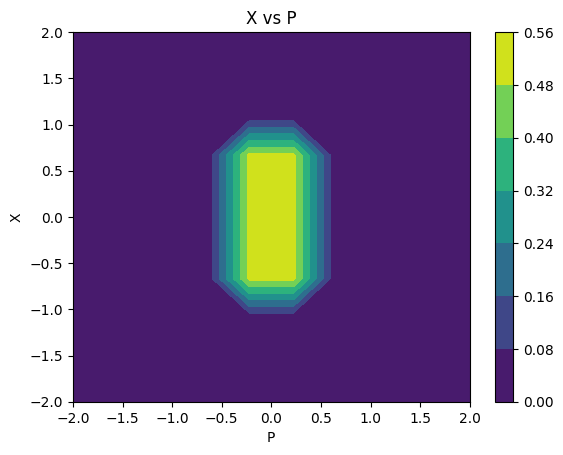

In [6]:
plt.figure()
plt.contourf(p_grid, x_grid, water_bag(), cmap='viridis')
plt.colorbar()
plt.xlabel('P')
plt.ylabel('X')
plt.title('X vs P')
plt.show()

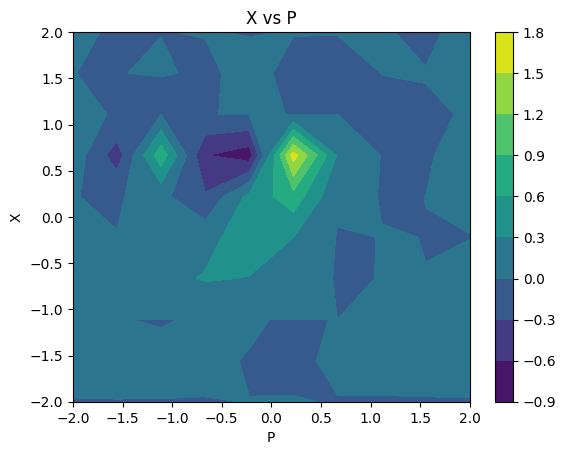

In [10]:
func_array_main = func_array_main.astype('float64')
plt.figure()
plt.contourf(p_grid, x_grid, func_array_main, cmap='viridis')
plt.colorbar()
plt.xlabel('P')
plt.ylabel('X')
plt.title('X vs P')
plt.show()

In [ ]:

"""
func_in=[] # usada en Do_func

def Alpha(x,i,array=x_values):
    return (array[i+1] - x)/(array[i+1] - array[i])

def Beta(x,i,array=x_values):
    return 1-Alpha(x,i)

def Gamma(x,i,array=x_values):
    return ( ((Alpha(x,i)**3) - Alpha(x,i))/6 )*((array[i+1]-array[i])**2)

def Delta(x,i,array=x_values):
    return (((Beta(x,i)**3)-Beta(x,i))/6)*((array[i+1]-array[i])**2)

def Do_func(func_in):# Crea una lista que es 2D para el contourf plot.
    list=[]
    for i in range(n_x):
        list=[]
        for j in range(n_p):
            list.append((p_values[j]*n_x+x_values[i]))
        func_in.append(list)
    func_in=np.array(func_in)
    return func_in


def Func_array(function):# crea un array 2D evaluando la funcion en cada punto de la malla, recorre primero en p moviendoce en x.
    list_loop=[]
    list_out=[]
    for i in range(n_x):
        for j in range(n_p):
            list_loop.append(function(x_values[i],p_values[j]))
        list_out.append(list_loop)
    list_out=np.array(list_loop)
    return  list_out

def Sec_derivate_func(function):
    list_loop= []
    list_out = []
    func_array = Func_array(function) 
    for j in range(n_p):
        for i in range(n_x):
            list_loop.append( -(1/560)*func_array[i-4][j] + (8/315)*func_array[i-3][j] - (1/5)*func_array[i-2][j] + (8/5)*func_array[i-1][j] - (205/72)*func_array[i][j] + (8/5)*func_array[i+1][j] - (1/5)*func_array[i+2][j] + (8/315)*func_array[i+3][j] - (1/560)*func_array[i+4][j] )
        list_out.append(list_loop)
    list_out=np.array(list_loop)
    return list_out

def Func_av(x,p,func_array):# Crea la funcion resultante "cubic spline as a interpolation method".
    list_loop= []
    list_out = []
    for j in range(n_p):
        for i in range(n_x):
            list_loop.append(Alpha(x,i)*func_array()[i][j] + Beta(x,i)*func_array[i+1][j] + Gamma(x,i)*Sec_derivate_func(func_array)[i][j] + Delta(x,i)*Sec_derivate_func(func_array)[i+1][j])
        list_out.append(list_loop)
    list_out=np.array(list_loop)
    return list_out






    --------------------------------------------


    def Sec_derivate_array_plus(func_array): #requiere igualar a una variable
    list_loop= []
    list_out = []
    for j in range(n_p):
        for i in range(n_x):
            list_loop.append( -(1/560)*func_array[i+1-4][j] + (8/315)*func_array[i+1-3][j] - (1/5)*func_array[i+1-2][j] + (8/5)*func_array[i+1-1][j] - (205/72)*func_array[(i+1)%n_x][j] + (8/5)*func_array[(i+1+1)%n_x][j] - (1/5)*func_array[(i+1+2)%n_x][j] + (8/315)*func_array[(i+1+3)%n_x][j] - (1/560)*func_array[(i+1+4)%n_x][j] )
        list_out.append(list_loop)
    list_out=np.array(list_loop)
    return list_out
"""